In [1]:
from pyecharts.charts import Map, Geo
from pyecharts import options as opts
import pandas as pd

## 数据读入

In [2]:
df = pd.read_csv('map1.csv')

In [3]:
province = df['Pinyin'].to_list()  # 省份
data = df['Value'].to_list()  # 数值
namemap = dict(zip(df['Name'], df['Pinyin']))  # 名称映射字典

In [4]:
namemap

{'澳门': 'Aomen',
 '贵州': 'Guizhou',
 '海南': 'Hainan',
 '湖北': 'Hubei',
 '台湾': 'Taiwan',
 '香港': 'Xianggang',
 '西藏': 'Tibet',
 '云南': 'Yunnan',
 '福建': 'Fujian',
 '湖南': 'Hunan',
 '陕西': 'Shaanxi',
 '山西': 'Shanxi',
 '天津': 'Tianjin',
 '甘肃': 'Gansu',
 '广西': 'Guangxi',
 '河北': 'Hebei',
 '宁夏': 'Ningxia',
 '重庆': 'Chongqing',
 '内蒙古': 'InnerMongolia',
 '浙江': 'Zhejiang',
 '新疆': 'Xinjiang',
 '吉林': 'Jilin',
 '安徽': 'Anhui',
 '黑龙江': 'Heilongjiang',
 '河南': 'Henan',
 '江西': 'Jiangxi',
 '北京': 'Beijing',
 '辽宁': 'Liaoning',
 '江苏': 'Jiangsu',
 '青海': 'Qinghai',
 '四川': 'Sichuan',
 '上海': 'Shanghai',
 '广东': 'Guangdong',
 '山东': 'Shandong',
 '南海诸岛': 'None'}

In [5]:
namemap['南海诸岛'] = ' '

## 分组变量

In [6]:
c = (
    Map(init_opts=opts.InitOpts(width="2000px", height="1000px", renderer='svg'))
        .add("", [list(z) for z in zip(province, data)], "china",name_map=namemap)
        .set_global_opts(
        title_opts=opts.TitleOpts(title=""),
        visualmap_opts=opts.VisualMapOpts(max_=260, ),

    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="Isolates source",
            subtitle="Isolates from provinces"
        ),
        tooltip_opts=opts.TooltipOpts(
            trigger="item"
        ),
        visualmap_opts=opts.VisualMapOpts(
            pieces= [
                {"min": 0, "max": 0, 'color':'white'}, #可以为每个分组通过color设置颜色
                {"min": 1, "max": 10, "label": '1-10', "color":'#c7c8c8'},
                {"min": 11, "max": 50, "label": '11-50', "color":'#aaaaaa'},
                {"min": 51, "max": 100, "label": '51-100', "color":'#9b999a'},
                {"min": 100, "max":258,  "label": '>100', "color":'#6d6d6d'}
            ],
            is_piecewise = True,
            pos_left = '20%'
        ),
    )
        .render("map_test.html")
)

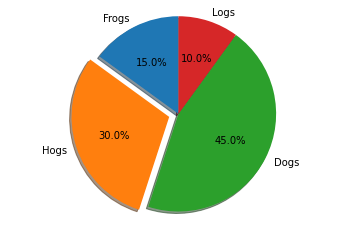

In [22]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

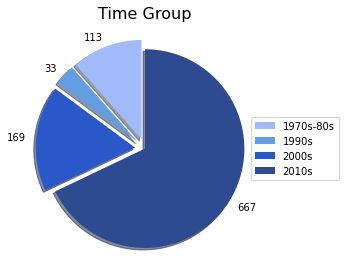

In [50]:
labels = ['1970s-80s', '1990s','2000s','2010s']
sizes = [113,33,169,667]
colors = ['#a1bafa','#659de2','#2a58c8','#2e4b91']
explode = (0.1, 0.1, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=sizes, colors = colors,
        shadow=True, startangle=90)
ax1.legend(labels ,loc='center right', bbox_to_anchor=(1.3, 0.5))
ax1.set_title('Time Group',size=16)
fig1.tight_layout()
plt.savefig('TimeGroup_pie.pdf')

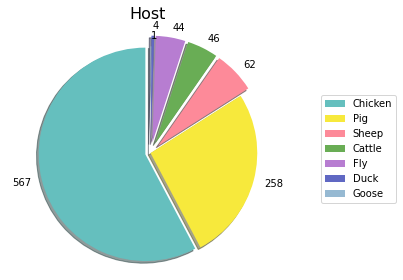

In [60]:
labels = ['Chicken','Pig','Sheep','Cattle','Fly','Duck','Goose']
sizes = [567,258,62,46,44,4,1]
colors = ['#65bfbe','#f7e93c','#fd8a99','#69ad55','#b77dd1','#6068c3','#96b9d2']
explode = (0.05, 0, 0.1, 0.1, 0.1, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=sizes, colors = colors,
        shadow=True, startangle=90)
ax1.legend(labels ,loc='center right', bbox_to_anchor=(1.4, 0.5))
ax1.set_title('Host',size=16)
ax1.axis('equal')
fig1.tight_layout()
plt.savefig('Host.pdf')

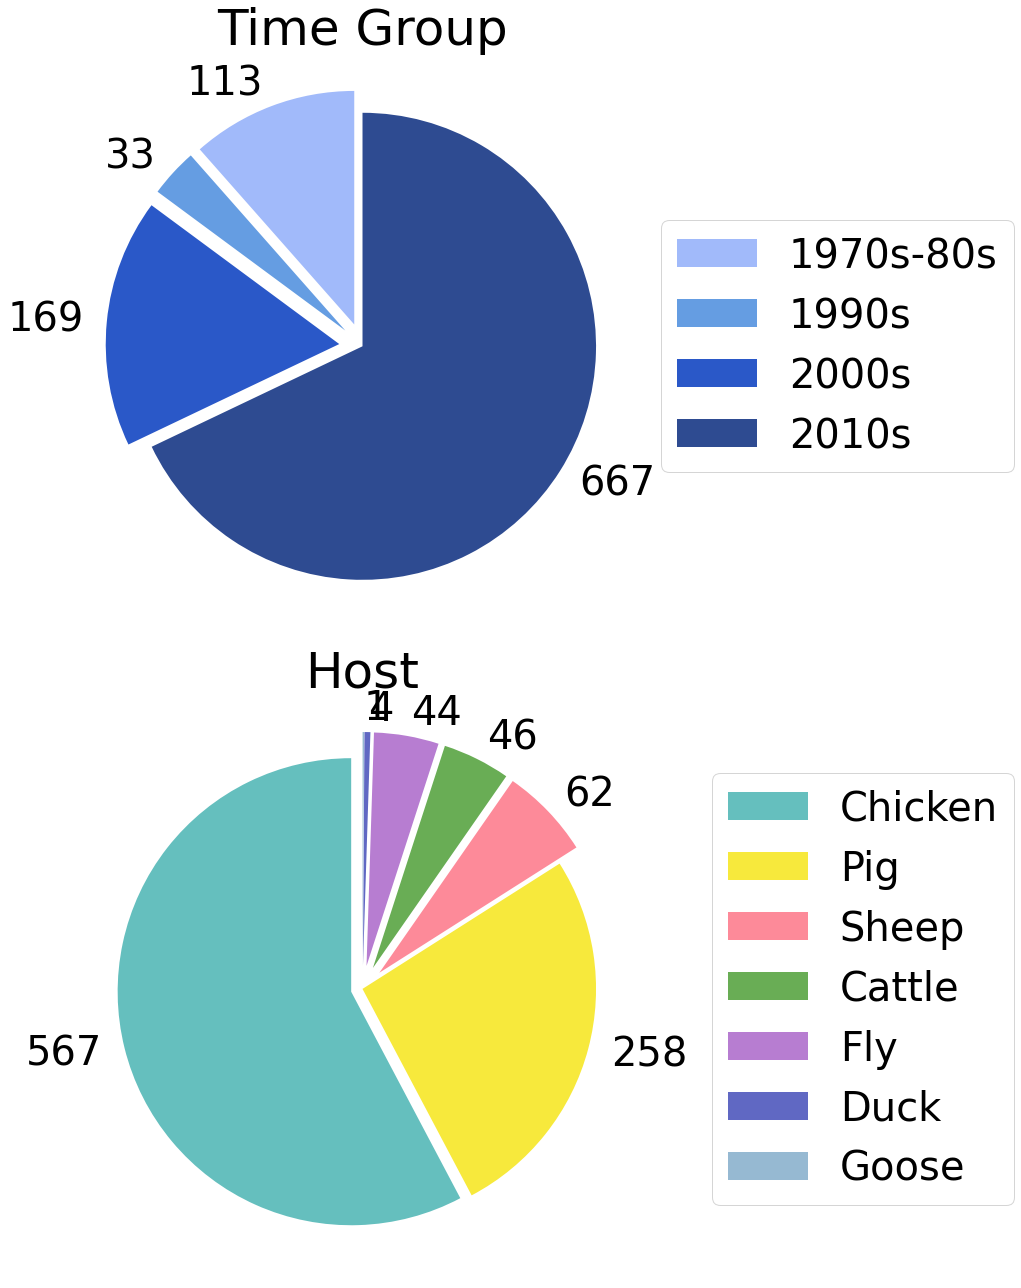

In [95]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 18))
labels_year = ['1970s-80s', '1990s','2000s','2010s']
sizes_year = [113,33,169,667]
colors_year = ['#a1bafa','#659de2','#2a58c8','#2e4b91']
explode_year = (0.1, 0.1, 0.1, 0)
ax1.pie(sizes_year, explode=explode_year, labels=sizes_year, labeldistance=1.1, colors = colors_year,
        shadow=False, startangle=90,
       textprops={'fontsize': 40})
ax1.legend(labels_year ,loc='center right', bbox_to_anchor=(1.65, 0.5), fontsize=40)
ax1.set_title('Time Group',size=50)

# Host pieplot
labels_host = ['Chicken','Pig','Sheep','Cattle','Fly','Duck','Goose']
sizes_host = [567,258,62,46,44,4,1]
colors_host = ['#65bfbe','#f7e93c','#fd8a99','#69ad55','#b77dd1','#6068c3','#96b9d2']
explode_host = (0.05, 0, 0.1, 0.1, 0.1, 0.1, 0.1)
ax2.pie(sizes_host, explode=explode_host, labels=sizes_host, labeldistance=1.1, colors = colors_host,
        shadow=False, startangle=90, 
        textprops={'fontsize': 40})
ax2.legend(labels_host ,loc='center right', bbox_to_anchor=(1.65, 0.5), fontsize=40)
ax2.set_title('Host',size=50)
# ax2.axis('equal')

fig.tight_layout()

plt.savefig('pie_plot.pdf')

In [14]:
c = (
    Map(init_opts=opts.InitOpts(width="2000px", height="1000px"))
        .add("", [list(z) for z in zip(province, data)], "china",name_map=namemap)
        .set_global_opts(
        title_opts=opts.TitleOpts(title=""),
        visualmap_opts=opts.VisualMapOpts(max_=260, ),

    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="Isolates source",
            subtitle="Isolates from provinces"
        ),
        tooltip_opts=opts.TooltipOpts(
            trigger="item"
        ),
        visualmap_opts=opts.VisualMapOpts(
            pieces= [
                {"min": 0, "max": 0, 'color':'white'}, #可以为每个分组通过color设置颜色
                {"min": 1, "max": 10, "label": '1-10', "color":'#c7c8c8'},
                {"min": 11, "max": 50, "label": '11-50', "color":'#aaaaaa'},
                {"min": 51, "max": 100, "label": '51-100', "color":'#9b999a'},
                {"min": 100, "max":258,  "label": '>100', "color":'#6d6d6d'}
            ],
            is_piecewise = True,
            pos_left = '20%'
        ),
    )
    .render('map_test.svg')
)

In [12]:
c.render('map_test.svg')

'/Users/cuiqingpo/Downloads/map/map_test.svg'

In [ ]:
! pip3 install snapshot-phantomjs

In [10]:
import base64
base64.encodestring = base64.encodebytes

In [11]:
! snapshot 'map_test.html' pdf

Generating file ...
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/bin/snapshot", line 8, in <module>
    sys.exit(main())
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyecharts_snapshot/main.py", line 86, in main
    asyncio.get_event_loop().run_until_complete(_main())
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 642, in run_until_complete
    return future.result()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyecharts_snapshot/main.py", line 108, in _main
    await make_a_snapshot(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyecharts_snapshot/main.py", line 142, in make_a_snapshot
    imagedata = decode_base64(base64_imagedata)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyecharts_snapshot/main.py", line 192, in decod

In [ ]:
! pip3 install pybase64

## 连续型变量

In [ ]:
c = (
    Map(init_opts=opts.InitOpts(width="2000px", height="1000px"))
        .add("", [list(z) for z in zip(province, data)], "china",name_map=namemap)
        .set_global_opts(
        title_opts=opts.TitleOpts(title=""),
        visualmap_opts=opts.VisualMapOpts(max_=260, ),

    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="Isolates source",
            subtitle="Isolates from provinces"
        ),
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{b}<br/>{c} (p / km2)"
        ),
        visualmap_opts=opts.VisualMapOpts(
            min_=0,
            max_=260,
            range_text=["High", "Low"],
            is_calculable=True,
            range_color=["white", "yellow", "orangered"],
            
        
        ),
    )
        .render("map.html")
)